### Q) Aim is to train the linear regression model for predicting the house prices in goregoan city 

In [198]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [199]:
df = pd.read_csv(r"c:\Users\Admin\Downloads\house_cleaned.csv",encoding='Latin')

In [200]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [201]:
# All are house only no patter formation we will drop it !!
df['property_type'].value_counts()

property_type
house    964
Name: count, dtype: int64

In [202]:
df['address'].value_counts()

address
DLF Phase 1, Gurgaon, Haryana                                                                                                              17
Nirvana Country, Gurgaon, Haryana                                                                                                          15
Palam Vihar, Gurgaon, Haryana                                                                                                              14
DLF Phase 2, Gurgaon, Haryana                                                                                                              13
Sector 48 Gurgaon, Gurgaon, Haryana                                                                                                        13
                                                                                                                                           ..
Iffco Chowk, Sector 17 Gurgaon, Gurgaon, Haryana                                                                                            

<Axes: xlabel='address', ylabel='Count'>

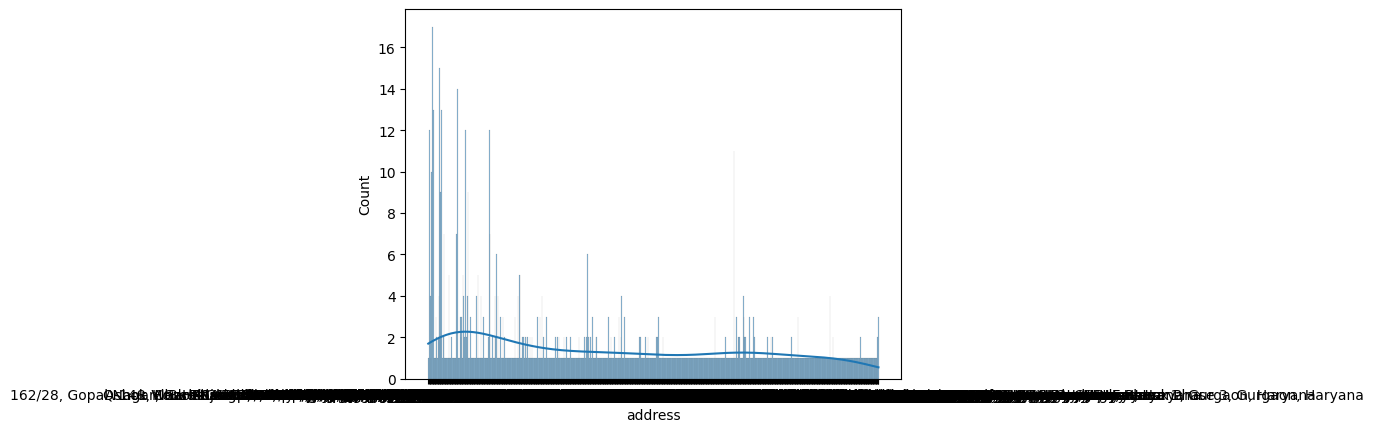

In [6]:
sns.histplot(x=df['address'],kde=True)

Due to smaller size of dataset  and address feature shows high noise , high cardinality and mixed info in one col , we will drop it 

In [203]:
top_area_types=df['areaWithType'].value_counts().nlargest(20).index #selects the 20 most frequent areatypes
df['areaWithType']=df['areaWithType'].where(df['areaWithType'].isin(top_area_types),'Other')

<Axes: xlabel='areaWithType'>

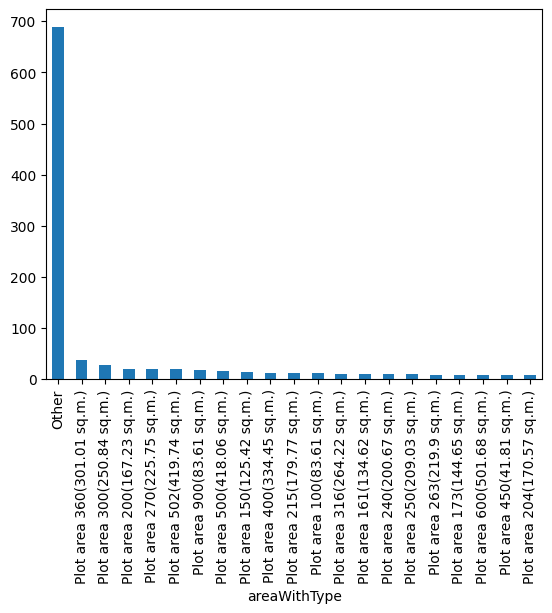

In [204]:
df['areaWithType'].value_counts().sort_values(ascending=False).plot.bar()

<Axes: xlabel='areaWithType', ylabel='Count'>

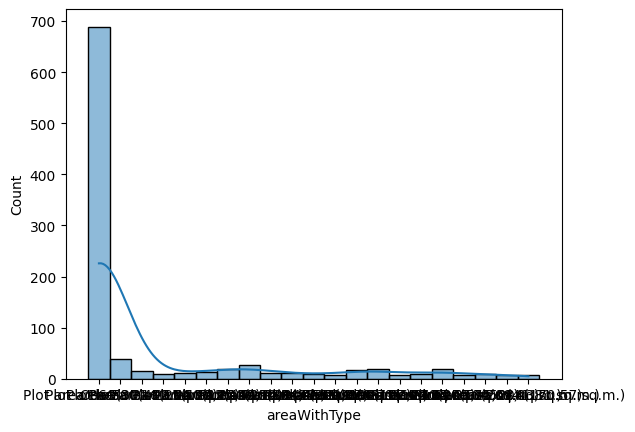

In [205]:
sns.histplot(df['areaWithType'],kde=True)

after grouping most frequent rows together and remaining to other , we still get highly imblanced results , hece we will drop it 

In [206]:
df['floorNum'].value_counts()

floorNum
3.0     304
2.0     289
1.0     181
4.0     136
5.0       9
0.0       6
14.0      3
6.0       3
12.0      2
10.0      2
11.0      2
13.0      1
27.0      1
21.0      1
20.0      1
41.0      1
51.0      1
16.0      1
33.0      1
Name: count, dtype: int64

In [207]:
valid_floors = df['floorNum'].value_counts()
valid_floors = valid_floors[valid_floors >=10].index

df['floorNum']=df['floorNum'].where(df['floorNum'].isin (valid_floors) , 'other')
df['floorNum'].value_counts()


floorNum
3.0      304
2.0      289
1.0      181
4.0      136
other     54
Name: count, dtype: int64

In [208]:
df['floorNum'] = df['floorNum'].replace('other', 18)
df['floorNum'] = df['floorNum'].astype(float)
df['floorNum'].value_counts()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21836\2049057205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['floorNum'] = df['floorNum'].replace('other', 18)


floorNum
3.0     304
2.0     289
1.0     181
4.0     136
18.0     54
Name: count, dtype: int64

In [209]:

df['floorNum'].skew()

np.float64(3.451525183366932)

<Axes: xlabel='floorNum', ylabel='Count'>

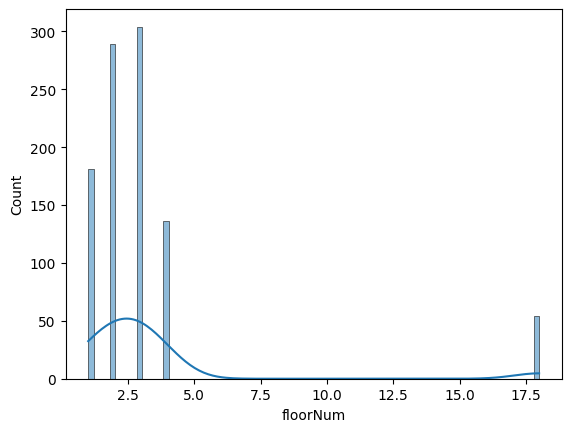

In [210]:
sns.histplot(df['floorNum'],kde=True)

<Axes: ylabel='floorNum'>

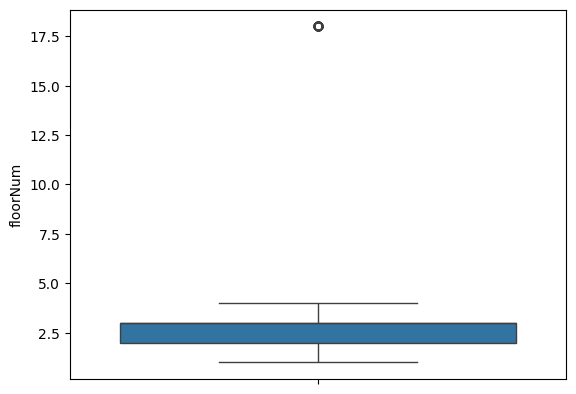

In [211]:
sns.boxplot(df['floorNum'])

#### Apply transformation to make the data normally distributed / gausion 

In [212]:
from sklearn.preprocessing import PowerTransformer
pi = PowerTransformer()
df['floorNum']=pi.fit_transform(df[['floorNum']])

-0.015509837984659101

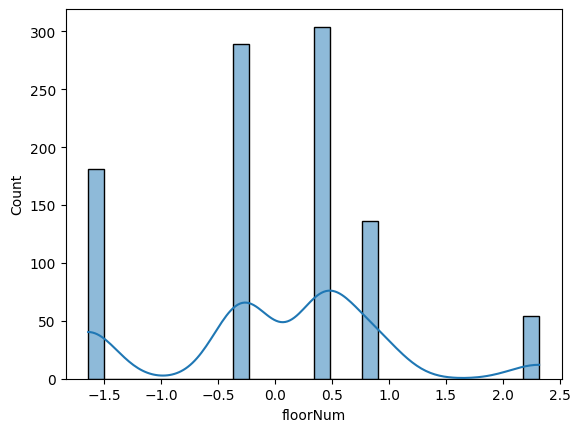

In [213]:
sns.histplot(df['floorNum'],kde=True)
df['floorNum'].skew().item() # col get normal distributed 

#### as the data became normally distributed , we will applt z score outlier detection method , and cap it 

<Axes: ylabel='floorNum'>

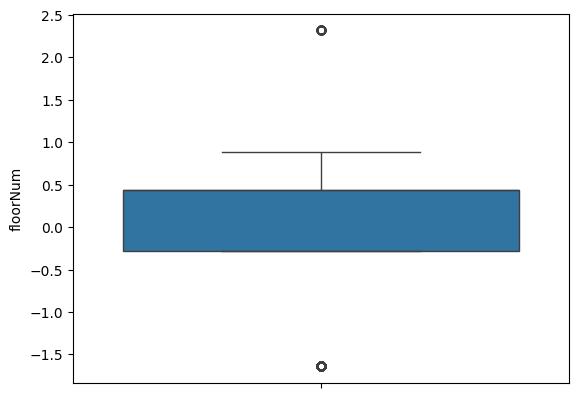

In [214]:
sns.boxplot(df['floorNum'])

In [215]:
print('Mean value of floor :',df['floorNum'].mean())
print('std value of floors :',df['floorNum'].std())

Mean value of floor : 6.486282235154441e-16
std value of floors : 1.0005190760795966


In [216]:
# Finding the boundary values 
print('highest floor boundary :', df['floorNum'].mean() + 3*df['floorNum'].std())
print('lowest floor boundary  :', df['floorNum'].mean() - 3*df['floorNum'].std())

highest floor boundary : 3.00155722823879
lowest floor boundary  : -3.0015572282387892


In [217]:
# Outliers 
df[(df['floorNum'] > 3) | (df['floorNum']<-3)]

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating


### hence there is no such valus present outside the desired boundaries , hence no outliers present 

In [218]:
df.drop(['property_name','society','property_type','areaWithType','address','description'],axis=1,inplace=True)

In [219]:
df.shape

(964, 14)

In [220]:
df.head(1)

,price,price_per_sqft,area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,rating
0,5.25,20115.0,2610.0,5,4,3+,servant room,0.436382,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."


In [221]:
df['balcony']=df['balcony'].replace({'3+':3})

Text(0, 0.5, 'No of houses')

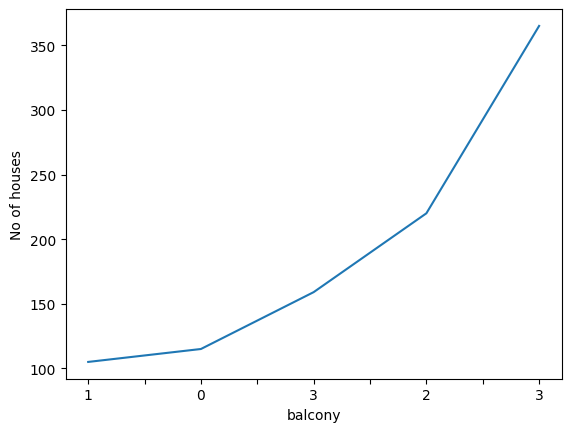

In [222]:
df['balcony'].value_counts().sort_values(ascending=True).plot()
plt.ylabel('No of houses')

In [223]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    386
servant room                                      81
pooja room,study room,servant room,store room     60
others                                            58
pooja room                                        38
pooja room,study room,servant room                33
pooja room,study room,servant room,others         32
store room                                        31
pooja room,servant room                           24
study room                                        19
study room,servant room                           19
servant room,store room                           15
pooja room,study room                             11
pooja room,others                                 11
pooja room,store room                             11
servant room,others                                8
pooja room,store room,study room,servant room      8
servant room,pooja room                            8
pooja room,servant room,store r

<Axes: xlabel='additionalRoom'>

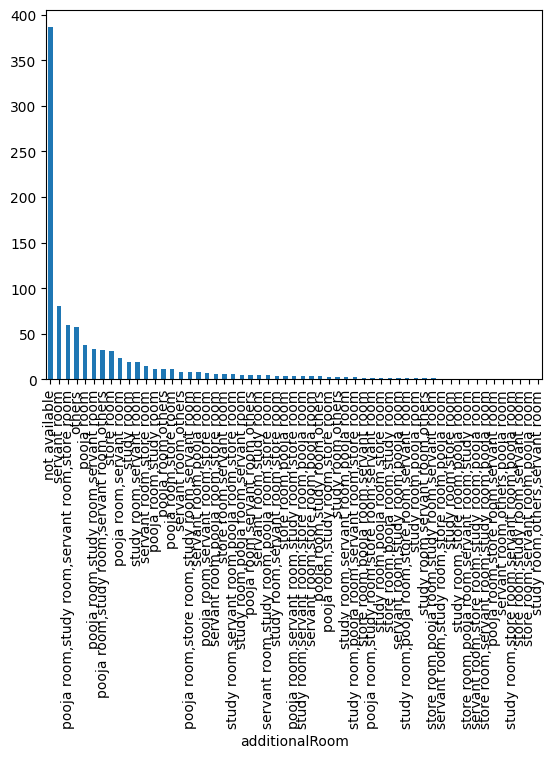

In [224]:
df['additionalRoom'].value_counts().sort_values(ascending=False).plot.bar()

In [225]:
# applied One-hot encoding for multi-valued categorical data (multilabel binarisation)
additional_dummies = df['additionalRoom'].str.get_dummies(sep=',')
additional_dummies.columns = additional_dummies.columns.str.strip()

In [226]:
df = pd.concat([df,additional_dummies],axis=1)
df.head(1)

,price,price_per_sqft,area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,rating,not available,others,pooja room,servant room,store room,study room
0,5.25,20115.0,2610.0,5,4,3,servant room,0.436382,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",0,0,0,1,0,0


In [227]:
df.drop(['additionalRoom'],axis=1,inplace=True)

In [228]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room'],
      dtype='object')

In [229]:
df.shape

(964, 19)

In [230]:
df['agePossession'].value_counts()  

agePossession
5 to 10 Year Old      250
1 to 5 Year Old       227
10+ Year Old          216
undefined             142
0 to 1 Year Old       109
Within 6 months         7
Jun 2024                2
Dec 2023                2
Under Construction      2
By 2027                 1
Oct 2024                1
By 2024                 1
Dec 2024                1
Within 3 months         1
Oct 2023                1
Jan 2024                1
Name: count, dtype: int64

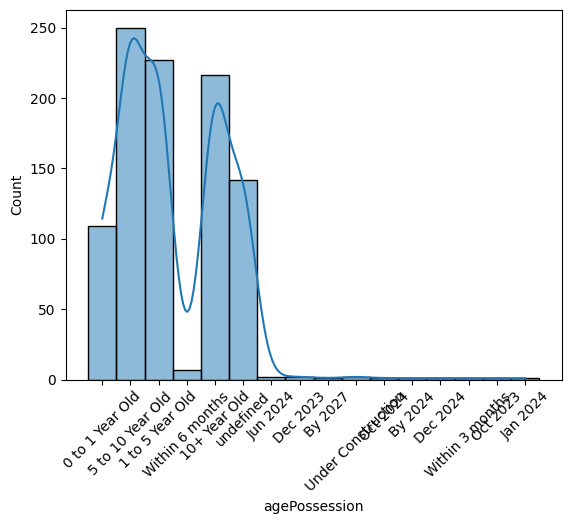

In [231]:
sns.histplot(df['agePossession'],kde=True)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='agePossession'>

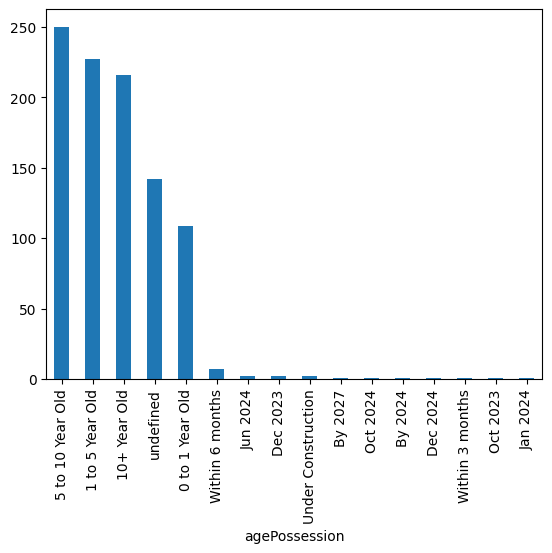

In [232]:
df['agePossession'].value_counts().sort_values(ascending=False).plot.bar()

In [233]:
valid_catagories = df['agePossession'].value_counts()
valid_catagories = valid_catagories[valid_catagories >=10].index

df['agePossession']= df['agePossession'].where(df['agePossession'].isin(valid_catagories) ,'Other')
df['agePossession'].value_counts()

agePossession
5 to 10 Year Old    250
1 to 5 Year Old     227
10+ Year Old        216
undefined           142
0 to 1 Year Old     109
Other                20
Name: count, dtype: int64

### applying numeric approximation on feature 

In [234]:
mapping = {
    'Within 6 months': 0.25,
    '0 to 1 Year Old': 0.5,
    '1 to 5 Year Old': 3,
    '5 to 10 Year Old': 7.5,
    '10+ Year Old': 12,
    'undefined': np.nan,
    'Other': np.nan
}
df['agePossession_num'] = df['agePossession'].map(mapping)
df['agePossession_num'].value_counts()

agePossession_num
7.5     250
3.0     227
12.0    216
0.5     109
Name: count, dtype: int64

In [235]:
df['agePossession_num'].fillna(df['agePossession_num'].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21836\1237048532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agePossession_num'].fillna(df['agePossession_num'].median(),inplace=True)


In [236]:
df['agePossession_num'].isnull().sum()

np.int64(0)

<Axes: xlabel='agePossession_num', ylabel='Count'>

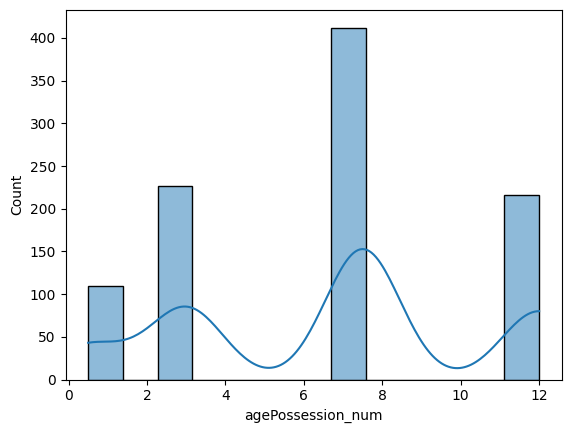

In [237]:
sns.histplot(df['agePossession_num'],kde=True)

In [238]:
df['agePossession_num'].skew() # symmetric distributation 

np.float64(-0.06560737863186464)

In [239]:
df.drop(columns=['agePossession'],inplace=True)

In [240]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'nearbyLocations', 'furnishDetails', 'features',
       'rating', 'not available', 'others', 'pooja room', 'servant room',
       'store room', 'study room', 'agePossession_num'],
      dtype='object')

In [241]:
df.shape

(964, 19)

In [242]:
df.head(1)

,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,nearbyLocations,furnishDetails,features,rating,not available,others,pooja room,servant room,store room,study room,agePossession_num
0,5.25,20115.0,2610.0,5,4,3,0.436382,North-East,"['Good Earth City Center 2', 'Kunskapsskolan I...","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",0,0,0,1,0,0,0.5


In [243]:
df['nearbyLocations'].value_counts()

nearbyLocations
['Guru dronacharya metro station', 'Dlf phase 1 metro station', 'Sikandarpur rmrg metro station', 'Sikanderpur metro station', 'Sikandarpur metro station', 'Dlf phase 2 metro station', 'Hanuman Mandir', 'Icici bank ATM', 'Axis bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Sikka Maternity And Surgical Center', 'Anahat Hospital', 'Divine Look Clinic Centre 1', 'The Dental Lounge', "St Stephen's Hospital Health Care Facility", 'Marwah Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Upkar Clinic', 'Surgi Center Clinic', 'Lord Krishna Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Cosmodentz Dental Clinic', 'Kailash Nursing Home Gurgaon', "Dr. Khullar's Dental Clinic", 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Sidhesh Hospital Gurgaon', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Cure and Care Centre', 'Religare Wellness', '98.4', 'Guardian', 'Emaar Business Park', 'Axis bank', 'Hsbc bank', 'Kotak mahindra bank', 'Hdfc 

Extract the imp aminities from  nearbylocation as new col, like : seperate the data on banks , mall , metrostation , hospital , school , cinema pvr etc house prices highly depend on such aminities 

In [244]:
df['metro']=df['nearbyLocations'].str.contains('metro',case=False,na=False).astype(int)
df['near_hospital']=df['nearbyLocations'].str.contains('hospital|clinic|medical',case=False,na=False,regex=True).astype(int)
df['near_school']=df['nearbyLocations'].str.contains('school|university|collage',case=False,na=False,regex=True).astype(int)
df['near_mall']=df['nearbyLocations'].str.contains('mall|cinema|marker|pvr',case=False,na=False,regex=True).astype(int)
df['near_bank']=df['nearbyLocations'].str.contains('bank|atm',case=False,na=False,regex=True).astype(int)

In [245]:
df.drop(columns=['nearbyLocations'],inplace=True)

In [246]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'furnishDetails', 'features', 'rating',
       'not available', 'others', 'pooja room', 'servant room', 'store room',
       'study room', 'agePossession_num', 'metro', 'near_hospital',
       'near_school', 'near_mall', 'near_bank'],
      dtype='object')

In [247]:
df['metro'].value_counts()

metro
0    597
1    367
Name: count, dtype: int64

In [248]:
df['near_hospital'].value_counts()

near_hospital
1    814
0    150
Name: count, dtype: int64

In [249]:
df['near_school'].value_counts()

near_school
1    631
0    333
Name: count, dtype: int64

In [250]:
df['others'].value_counts()

others
0    839
1    125
Name: count, dtype: int64

In [251]:
df['furnishDetails'].value_counts()

furnishDetails
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     84
[]                                                                                                                                                                                                                                                                       76
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']       25
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa',

we devide the house into three cat based on col furnishedDetails : 
1. furnished 
2. semifurnished
3. unfurnished 

In [252]:
print(type(df['furnishDetails'].iloc[0]))

<class 'str'>


In [253]:
# convert string list to python list using literal_eval
import ast 
def clean_list(x):
    if isinstance(x,str):
        try:
            return ast.literal_eval(x) 
        except:
            return []
    return x
df['furnishDetails']=df['furnishDetails'].apply(clean_list)


In [254]:
df['furnishDetails'].value_counts()

furnishDetails
[1 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier]     84
[]                                                                                                                                                                                                                                   76
[1 Wardrobe, 1 Fan, 1 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Washing Machine, No Water Purifier]       25
[1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Geyser, No Light, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier]      5
[1 Fan, 1 Light, No AC, No Bed, No Chimney, No Curtains, 

In [255]:
print(type(df['furnishDetails'].iloc[0]))

<class 'list'>


In [256]:
def furnished_detail(items):
    if not isinstance(items, list) or len(items) == 0:
        return 'Unfurnished'
    else:
        count = 0
        for item in items:
            if not item.lower().startswith('no'):
                count += 1

        if count <= 2:
            return 'Unfurnished'
        elif count <= 6:
            return 'Semi-furnished'
        else:
            return 'Furnished'
    
df['furnish_level']=df['furnishDetails'].apply(furnished_detail)

In [257]:
df['furnish_level']

0           Furnished
1      Semi-furnished
2      Semi-furnished
3           Furnished
4           Furnished
            ...      
959       Unfurnished
960       Unfurnished
961       Unfurnished
962       Unfurnished
963         Furnished
Name: furnish_level, Length: 964, dtype: object

In [258]:
df['furnish_level'].value_counts()

furnish_level
Unfurnished       462
Furnished         280
Semi-furnished    222
Name: count, dtype: int64

<Axes: xlabel='furnish_level', ylabel='Count'>

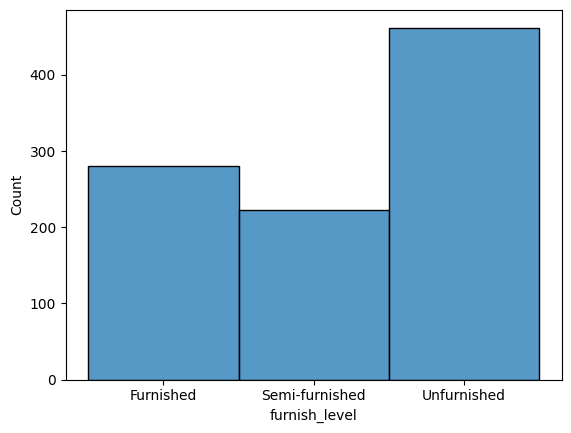

In [259]:
sns.histplot(df['furnish_level'])

we will label encode it while doing feature engineering 

In [260]:
df.drop(columns=['furnishDetails'],axis=1,inplace=True)

In [261]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room',
       'agePossession_num', 'metro', 'near_hospital', 'near_school',
       'near_mall', 'near_bank', 'furnish_level'],
      dtype='object')

In [262]:
df['features'].value_counts()

features
['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']                                                                                                                                                                                                                                                                                                                                                                                                                                                                   39
['Water Storage']                                                                                                                                                                                                                                                                                                                                                                

In [263]:
df['features'].isnull().sum()

np.int64(302)

In [264]:
type(df['features'].iloc[0])

str

In [265]:
from sklearn.impute import SimpleImputer

In [266]:
#fill fetures col 
imputer = SimpleImputer(strategy='constant',fill_value='None')
df['features']=imputer.fit_transform(df[['features']]).ravel()



In [267]:
df['features'].isnull().sum()

np.int64(0)

 features contains lots of messy data in a col , it contains str,'[]',[,dummy names which creats multiple cols of the same name each time , so now we create a func name clean list to clean the list to the python list 

In [268]:
import ast
def clean_list(x):
    try:
        lst = ast.literal_eval(x) # converts str list to actual python list '[]'--->[]
        return [i.strip() for i in lst]
    except: 
        return []


In [269]:
df['feature_clean']=df['features'].apply(clean_list)

In [270]:
df['feature_clean'].value_counts()

feature_clean
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   302
[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Maintenance Staff, Water Storage, Park, Visitor Parking, Waste Disposal, Rain Water Harvesting]                                                                                                                                                                                                                                                                         

count the total amenities (features) in each rows 

In [271]:
df['amenity_count']=df['feature_clean'].apply(
    lambda x: len(x) if isinstance(x,list) else 0
)

In [272]:
df['amenity_count'] # this is the row wisse  e count of all the amenities around the hou

0       8
1       6
2       4
3       8
4       4
       ..
959    13
960     6
961    11
962    12
963    25
Name: amenity_count, Length: 964, dtype: int64

<Axes: xlabel='amenity_count', ylabel='Count'>

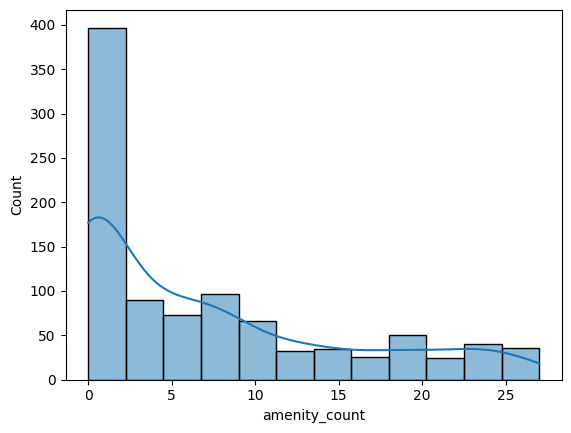

In [273]:
sns.histplot(df['amenity_count'],kde=True)

In [274]:
df.drop(columns=['feature_clean'],axis=1,inplace=True)

In [275]:
df.drop(columns=['features'],axis=1,inplace=True)

In [276]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'rating', 'not available', 'others', 'pooja room',
       'servant room', 'store room', 'study room', 'agePossession_num',
       'metro', 'near_hospital', 'near_school', 'near_mall', 'near_bank',
       'furnish_level', 'amenity_count'],
      dtype='object')

In [277]:
df.shape

(964, 23)

### NOW For Ratings 

In [278]:
df['rating'].value_counts()


rating
['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']          125
['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']          112
['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity4 out of 5', 'Safety4 out of 5']          112
['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5']           54
['Environment4 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']           47
                                                                                                       ... 
['Environment4 out of 5', 'Safety4 out of 5', 'Lifestyle4.5 out of 5', 'Connectivity4 out of 5']          1
['Environment4.5 out of 5', 'Safety4.5 out of 5', 'Lifestyle4 out of 5', 'Connectivity3.5 out of 5']      1
['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle4.5 out of 5', 'Connectivity5 out of 5']          1
['Environment4.5 out 

In [279]:
type(df['rating'].iloc[0])

str

In [280]:
df['rating'].isnull().sum()

np.int64(121)

In [281]:
# func to convert string to python list 
import ast
def clean_list(x):
    if isinstance(x,str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x

df['clean_rating'] = df['rating'].apply(clean_list)
    

In [282]:
df['clean_rating'].value_counts()

clean_rating
[Environment5 out of 5, Lifestyle5 out of 5, Connectivity5 out of 5, Safety5 out of 5]          125
[Environment4 out of 5, Lifestyle4 out of 5, Connectivity5 out of 5, Safety4 out of 5]          112
[Environment4 out of 5, Lifestyle4 out of 5, Connectivity4 out of 5, Safety4 out of 5]          112
[Environment5 out of 5, Safety5 out of 5, Lifestyle5 out of 5, Connectivity5 out of 5]           54
[Environment4 out of 5, Lifestyle5 out of 5, Connectivity5 out of 5, Safety4 out of 5]           47
                                                                                               ... 
[Environment4 out of 5, Safety4 out of 5, Lifestyle4.5 out of 5, Connectivity4 out of 5]          1
[Environment4.5 out of 5, Safety4.5 out of 5, Lifestyle4 out of 5, Connectivity3.5 out of 5]      1
[Environment5 out of 5, Safety5 out of 5, Lifestyle4.5 out of 5, Connectivity5 out of 5]          1
[Environment4.5 out of 5, Safety4.5 out of 5, Lifestyle4.5 out of 5, Connectivity5 out 

In [283]:
df['clean_rating'].iloc[0]

['Environment5 out of 5',
 'Lifestyle4 out of 5',
 'Connectivity4 out of 5',
 'Safety4 out of 5']

In [284]:
type(df['clean_rating'].iloc[0])

list

In [285]:
# func to extract no.
def get_rating(items,key):
    if not isinstance(items,list):
        return None
    for item in items:
        if key in item:
            return float(item.split(key)[1].split(' out of')[0])
    return None
    

In [286]:
df['Environment_rating']=df['clean_rating'].apply(lambda x: get_rating(x,'Environment'))
df['Lifestyle_rating']=df['clean_rating'].apply(lambda x: get_rating(x,'Lifestyle'))
df['Connectivity_rating']=df['clean_rating'].apply(lambda x: get_rating(x,'Connectivity'))
df['Safety_rating']=df['clean_rating'].apply(lambda x: get_rating(x,'Safety'))

In [287]:
df['Environment_rating'].value_counts()

Environment_rating
4.0    401
5.0    325
3.0     76
4.5     28
3.5     13
Name: count, dtype: int64

<Axes: xlabel='Environment_rating', ylabel='Count'>

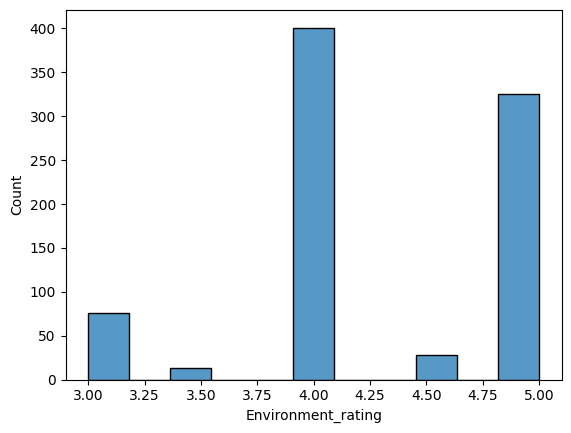

In [288]:
sns.histplot(df['Environment_rating'])

In [289]:
df['Lifestyle_rating'].value_counts()

Lifestyle_rating
4.0    489
5.0    315
4.5     28
3.0      8
3.5      3
Name: count, dtype: int64

<Axes: xlabel='Lifestyle_rating', ylabel='Count'>

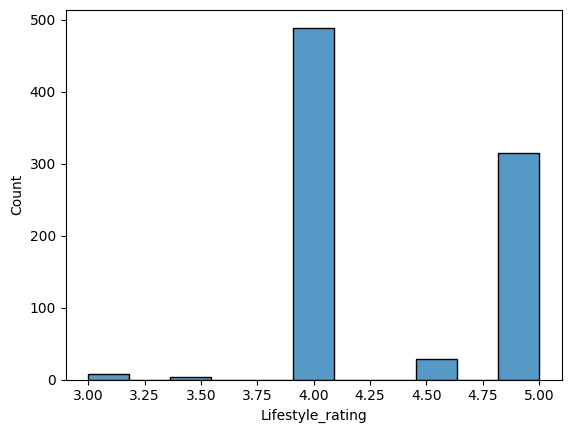

In [290]:
sns.histplot(df['Lifestyle_rating'])

similarly for connectivity ,count of houses whose ratings are 4 and 5 are more 

In [291]:
df['Connectivity_rating'].value_counts()

Connectivity_rating
5.0    525
4.0    238
3.5     40
4.5     36
3.0      4
Name: count, dtype: int64

<Axes: xlabel='Connectivity_rating', ylabel='Count'>

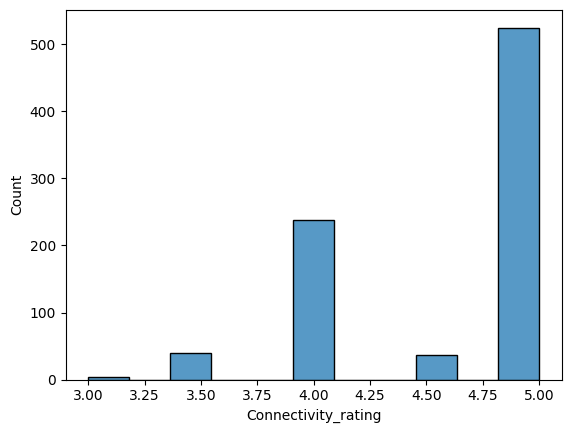

In [292]:
sns.histplot(df['Connectivity_rating'])

In [293]:
df['Safety_rating'].value_counts()

Safety_rating
4.0    506
5.0    235
4.5     74
3.0     23
3.5      5
Name: count, dtype: int64

<Axes: xlabel='Safety_rating', ylabel='Count'>

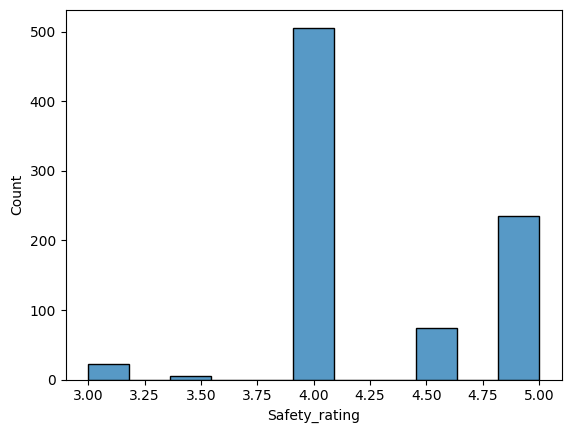

In [294]:
sns.histplot(df['Safety_rating'])

In [295]:
cols=['Connectivity_rating','Safety_rating','Lifestyle_rating','Environment_rating']

In [296]:
df[cols]=df[cols].fillna(df[cols].median())

In [297]:
df['Environment_rating'].isnull().sum()

np.int64(0)

In [298]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'rating', 'not available', 'others', 'pooja room',
       'servant room', 'store room', 'study room', 'agePossession_num',
       'metro', 'near_hospital', 'near_school', 'near_mall', 'near_bank',
       'furnish_level', 'amenity_count', 'clean_rating', 'Environment_rating',
       'Lifestyle_rating', 'Connectivity_rating', 'Safety_rating'],
      dtype='object')

In [299]:
df.drop(['rating','clean_rating'],axis=1,inplace=True)

In [300]:
df.shape

(964, 26)

In [301]:
df.isnull().sum()

price                   19
price_per_sqft          19
area                    19
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                 303
not available            0
others                   0
pooja room               0
servant room             0
store room               0
study room               0
agePossession_num        0
metro                    0
near_hospital            0
near_school              0
near_mall                0
near_bank                0
furnish_level            0
amenity_count            0
Environment_rating       0
Lifestyle_rating         0
Connectivity_rating      0
Safety_rating            0
dtype: int64

In [302]:
df['facing'].isnull().mean()*100 # % of data missing 

np.float64(31.431535269709542)

 missing % is high , hence i create a new col called 'unknown' ,just to keep my original data distributation const , and model learn from  missing data 

In [303]:
df['facing']=df['facing'].fillna('Unknown')

In [304]:
df['facing'].isnull().sum()

np.int64(0)

In [305]:
df['facing'].value_counts()

facing
Unknown       303
East          178
North-East    158
North         109
West           75
North-West     44
South-East     39
South          34
South-West     24
Name: count, dtype: int64

i will one hot encode it Later!!

In [306]:
df.isnull().sum()

price                  19
price_per_sqft         19
area                   19
bedRoom                 0
bathroom                0
balcony                 0
floorNum                0
facing                  0
not available           0
others                  0
pooja room              0
servant room            0
store room              0
study room              0
agePossession_num       0
metro                   0
near_hospital           0
near_school             0
near_mall               0
near_bank               0
furnish_level           0
amenity_count           0
Environment_rating      0
Lifestyle_rating        0
Connectivity_rating     0
Safety_rating           0
dtype: int64

<Axes: xlabel='facing', ylabel='Count'>

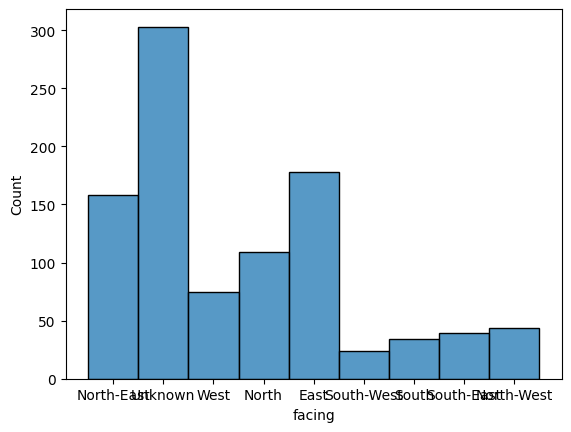

In [307]:
sns.histplot(df['facing'])

<Axes: ylabel='Frequency'>

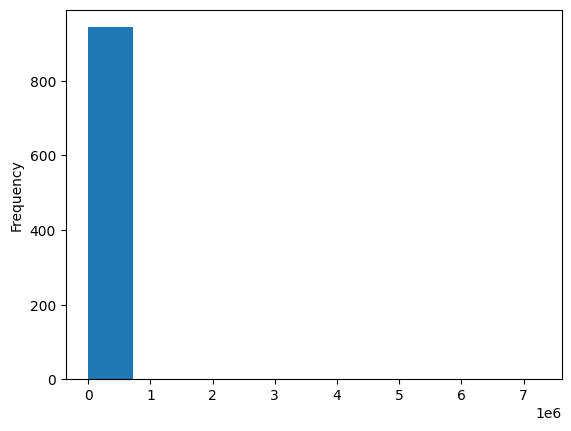

In [308]:
df['area'].plot.hist()

<Axes: xlabel='area', ylabel='Density'>

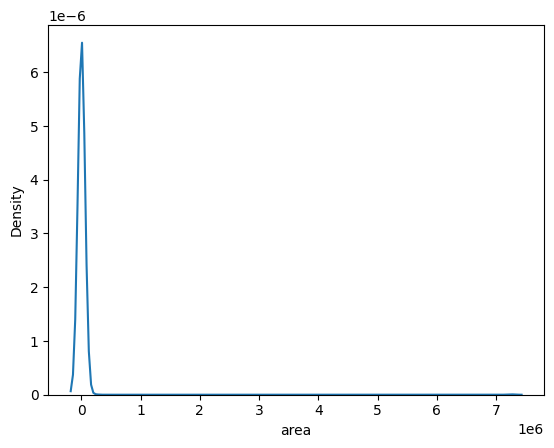

In [309]:
sns.kdeplot(df['area'])

In [310]:
df['area'].value_counts()

area
3240.0     45
900.0      39
2700.0     36
1800.0     30
1350.0     21
           ..
818.0       1
22498.0     1
15479.0     1
3870.0      1
2425.0      1
Name: count, Length: 399, dtype: int64

In [311]:
df['area'].skew() # heavy right skewed 

np.float64(30.677085133157934)

<Axes: >

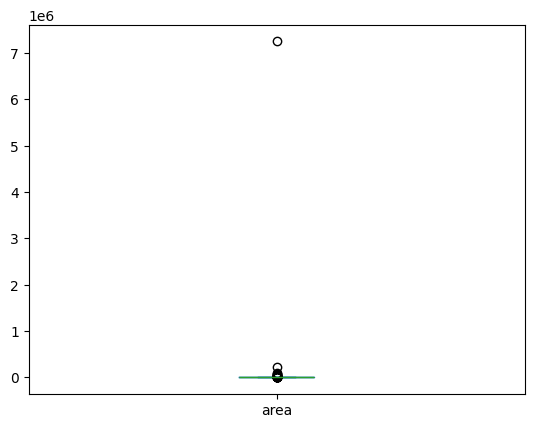

In [312]:
df['area'].plot.box()

In [313]:
#Handling outliers using IQR method 
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

In [314]:
lower_limit

np.float64(-2411.5)

In [315]:
upper_limit

np.float64(6552.5)

In [316]:
df[(df['area']>upper_limit)|(df['area']<lower_limit)].shape # this are outliers 

(36, 26)

### capping 

In [317]:
df['area']=np.where(
    df['area']>upper_limit,
    upper_limit,
    np.where(
        df['area']<lower_limit,
        lower_limit,
        df['area']
    )

)

<Axes: xlabel='area', ylabel='Count'>

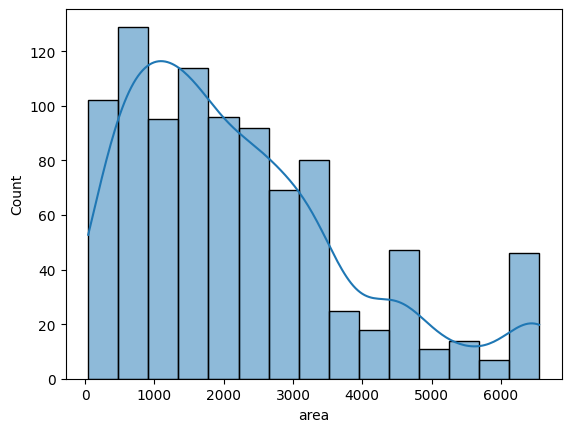

In [318]:
sns.histplot(df['area'],kde=True)

<Axes: ylabel='area'>

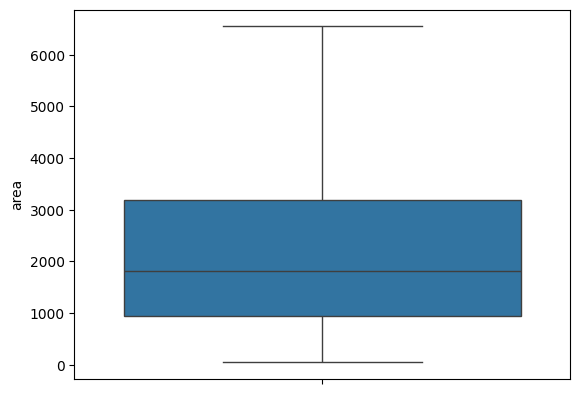

In [319]:
sns.boxplot(df['area'])

In [320]:
df['area']=df['area'].fillna(df['area'].median())

In [321]:
df.isnull().sum()

price                  19
price_per_sqft         19
area                    0
bedRoom                 0
bathroom                0
balcony                 0
floorNum                0
facing                  0
not available           0
others                  0
pooja room              0
servant room            0
store room              0
study room              0
agePossession_num       0
metro                   0
near_hospital           0
near_school             0
near_mall               0
near_bank               0
furnish_level           0
amenity_count           0
Environment_rating      0
Lifestyle_rating        0
Connectivity_rating     0
Safety_rating           0
dtype: int64

Drop price_per_sqft col because this may create "TARGET LEAKAGE" ,higher risk of overfitting the data 

In [322]:
df.drop(columns=['price_per_sqft'],axis=1,inplace=True)

<Axes: xlabel='price', ylabel='Count'>

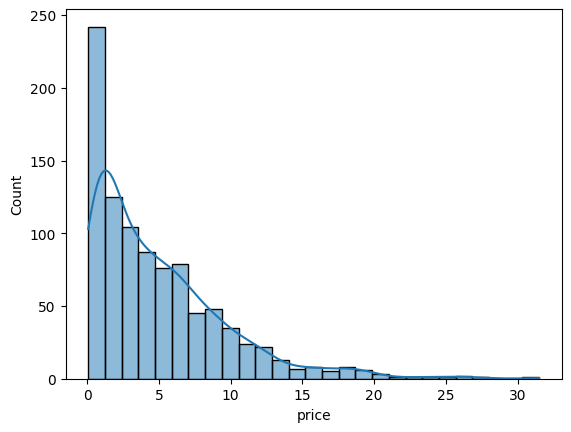

In [323]:
sns.histplot(df['price'],kde=True)

In [324]:
df['price'].value_counts()

price
3.50    19
5.50    17
6.50    16
6.00    14
4.50    13
        ..
3.80     1
7.45     1
7.42     1
6.09     1
2.98     1
Name: count, Length: 293, dtype: int64

In [325]:
df['price'].skew()

np.float64(1.636328440629496)

<Axes: ylabel='price'>

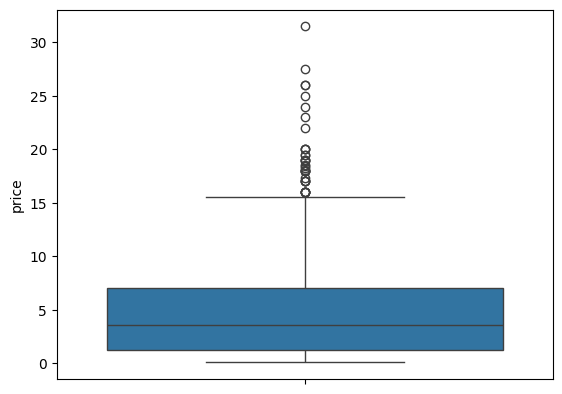

In [326]:
sns.boxplot(df['price']) # col contains outliers 

In [327]:
# IQR 
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR =Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-7.499999999999999
15.7


In [328]:
df[(df['price']>upper)|(df['price']<lower)].shape

(36, 25)

In [329]:
#capping
df['price']=np.where(
    df['price']>upper,
    upper,
    np.where(
        df['price']<lower,
        lower,
        df['price']
    )
)

<Axes: ylabel='price'>

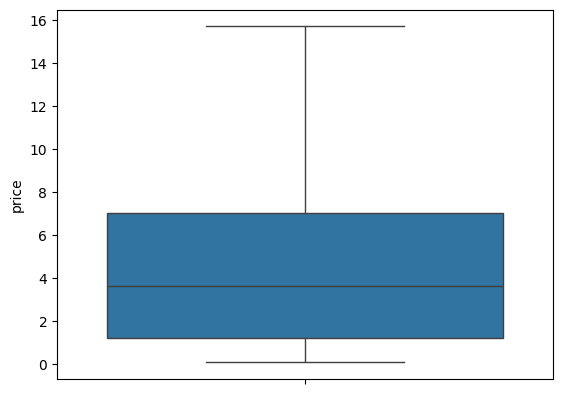

In [330]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

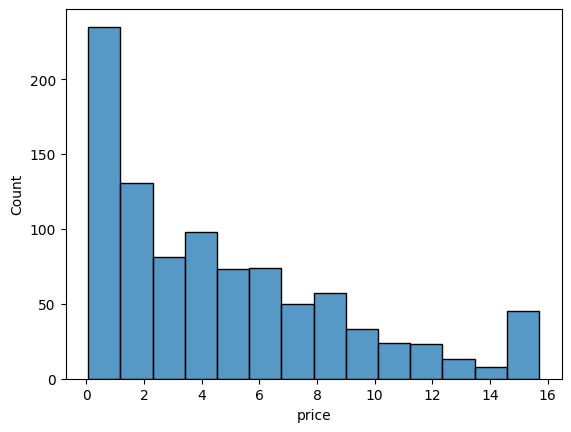

In [331]:
sns.histplot(df['price'])

In [332]:
df['price'].skew() # data is slight right skewed we use meadian to fill missing values 

np.float64(1.0221303123264278)

In [333]:
df['price']=df['price'].fillna(df['price'].median())

In [334]:
df.isnull().sum()

price                  0
area                   0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
facing                 0
not available          0
others                 0
pooja room             0
servant room           0
store room             0
study room             0
agePossession_num      0
metro                  0
near_hospital          0
near_school            0
near_mall              0
near_bank              0
furnish_level          0
amenity_count          0
Environment_rating     0
Lifestyle_rating       0
Connectivity_rating    0
Safety_rating          0
dtype: int64

<Axes: xlabel='bathroom', ylabel='Count'>

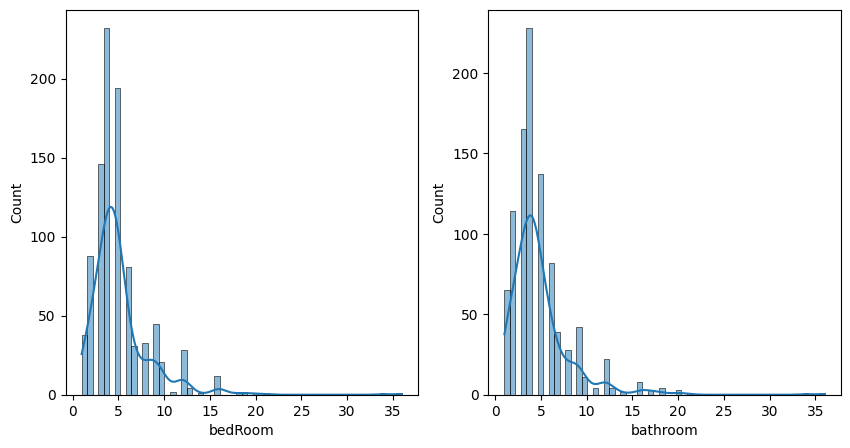

In [335]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['bedRoom'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['bathroom'],kde=True)

In [336]:
df.columns

Index(['price', 'area', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'not available', 'others', 'pooja room', 'servant room', 'store room',
       'study room', 'agePossession_num', 'metro', 'near_hospital',
       'near_school', 'near_mall', 'near_bank', 'furnish_level',
       'amenity_count', 'Environment_rating', 'Lifestyle_rating',
       'Connectivity_rating', 'Safety_rating'],
      dtype='object')

In [337]:
df['price']=np.log1p(df['price']) #transform

Applying featuring engineering on two remaining features 

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [392]:
X = df.drop(columns=['price'],axis=1)
Y=df['price']

In [393]:
Y

0      1.832581
1      1.902108
2      1.131402
3      1.791759
4      1.386294
         ...   
959    1.871802
960    1.658228
961    1.704748
962    1.446919
963    1.526056
Name: price, Length: 964, dtype: float64

In [394]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [370]:
X_train.shape

(771, 24)

In [371]:
X_test.shape

(193, 24)

In [372]:
Y_test.shape

(193,)

In [373]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ,StandardScaler
from sklearn.decomposition import PCA

data --> onehot,ordinal encoder ---> scale --> pca--->model train ---> r2 score

In [395]:
# One hot encoding on facing and Ordinal Encoding on furnished 
num_cols=[
    'area',
    'bedRoom',
    'bathroom',
    'balcony',
    'floorNum',
    'agePossession_num',
    'amenity_count',
    'Environment_rating',
    'Lifestyle_rating',
    'Connectivity_rating',
    'Safety_rating'  
]

trf1=ColumnTransformer(
    transformers=[
        ('one_hot_facing',OneHotEncoder(handle_unknown='ignore'),['facing']),
        ('ordinal_furnished',OrdinalEncoder(categories=[['Unfurnished','Semi-furnished','Furnished']]),['furnish_level']),
        ('scaling',StandardScaler(),num_cols)
    ],
    remainder='passthrough'
)


In [409]:
# Trf2  dimentionality reduction 
trf2=PCA(n_components=27)

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

trf3 = LinearRegression()

pipeline=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [411]:
pipeline.fit(X_train,Y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('one_hot_facing', ...), ('ordinal_furnished', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [399]:
trf2.explained_variance_.shape 

(32,)

In [400]:
np.cumsum(trf2.explained_variance_ratio_) #Cumulative sum

array([0.26958095, 0.41146559, 0.51964914, 0.58464989, 0.64131221,
       0.69302675, 0.73592897, 0.76901397, 0.79714707, 0.82086346,
       0.84388044, 0.86402978, 0.8807353 , 0.89543211, 0.90855392,
       0.91962846, 0.93034285, 0.93918463, 0.94765031, 0.95489543,
       0.96175447, 0.96843416, 0.97424532, 0.97931345, 0.98348309,
       0.98714625, 0.99052474, 0.99340287, 0.99614765, 0.99831565,
       1.        , 1.        ])

Text(0, 0.5, 'Varience explained')

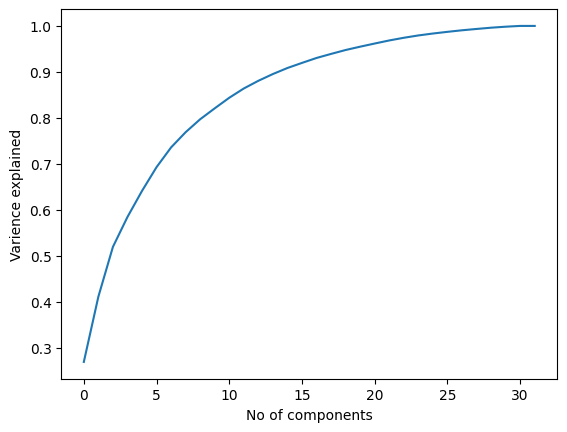

In [401]:
plt.plot(np.cumsum(trf2.explained_variance_ratio_)) # choose from the n_components which explain above 90% of varience 
plt.xlabel('No of components')
plt.ylabel('Varience explained')

In [412]:
y_pred = pipeline.predict(X_test)
y_pred

array([2.43876618, 1.82596596, 1.61680432, 2.26237129, 1.72857615,
       0.85031756, 1.01803163, 1.90744042, 2.21388494, 1.93710831,
       1.66036641, 2.19908674, 1.70307649, 1.75057957, 2.66340027,
       0.71650731, 1.6414536 , 0.89220438, 2.39987492, 2.03291751,
       1.74115966, 2.17454475, 0.9392457 , 0.76942013, 1.23820357,
       1.81709291, 0.94628832, 1.8667029 , 1.66643905, 1.99593029,
       0.64314572, 0.46413002, 2.05017481, 0.97043924, 2.45358123,
       0.94787994, 1.62977642, 2.21689102, 2.48335422, 0.99989978,
       1.11386302, 2.26888613, 2.75580008, 1.5684518 , 0.50472522,
       1.30313934, 1.18101031, 1.98187106, 1.22955077, 0.96302121,
       2.61579688, 1.02708537, 1.98431395, 0.7135225 , 2.25486291,
       1.02459809, 1.19368546, 1.23899104, 0.53475046, 2.51899957,
       1.31731387, 1.16454688, 1.99336032, 2.07137056, 0.78541476,
       1.8668516 , 1.60675459, 2.12214943, 2.41660559, 1.01867499,
       0.59579617, 1.46676641, 0.75016572, 1.24079658, 1.90524

In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(Y_test,y_pred)
r2_test

0.684132550868165

In [415]:
r2_train = r2_score(Y_train,pipeline.predict(X_train))
r2_train

0.7426624878026155